In [592]:
!pip install -U scikit-learn
import sklearn
from sklearn import ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
!pip install prophet



   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 3.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.1 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.1 MB 3.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/12.1 MB 4.5 MB/s eta 0:00:02
   --------------- ------------------------ 4.7/12.1 MB 4.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.1 MB 5.1 MB/s eta 0:00:02
   ------------------------ --------------- 7.3/12.1 MB 5.2 MB/s eta 0:00:01
   -------------------------- ------------- 8.1/12.1 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 9.4/12.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.1 MB 5.0 MB/s eta 0:00:01
   -------------------------------------- - 11.5/12.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 5.0 MB/s  0:00:02
   ---

In [534]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [535]:
import pandas as pd

WeatherMun = pd.read_csv("WeatherMun.csv", index_col="date")

In [536]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
1/1/2000,28.1,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN
1/2/2000,27.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1/3/2000,27.0,NaN,NaN,0.0,NaN,NaN,12.9,NaN,NaN,NaN
1/4/2000,26.9,23.0,30.0,0.0,NaN,NaN,12.7,NaN,NaN,NaN
1/5/2000,27.2,NaN,NaN,0.0,NaN,NaN,7.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11/15/2025,29.0,26.0,33.0,NaN,NaN,NaN,9.0,NaN,1010.1,NaN
NaN,NaN,26.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,26.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [537]:
null_pct = WeatherMun.apply(pd.isnull).sum()/WeatherMun.shape[0]

In [538]:
WeatherMun.apply(pd.isnull).sum()

tavg       8
tmin    1123
tmax    1178
prcp    5500
snow    9455
wdir    9455
wspd     370
wpgt    9455
pres    5748
tsun    9455
dtype: int64

In [539]:
null_pct

tavg    0.000846
tmin    0.118773
tmax    0.124590
prcp    0.581703
snow    1.000000
wdir    1.000000
wspd    0.039133
wpgt    1.000000
pres    0.607932
tsun    1.000000
dtype: float64

In [540]:
valid_columns = WeatherMun.columns[null_pct < 0.05]

In [541]:
valid_columns

Index(['tavg', 'wspd'], dtype='object')

In [542]:
WetaherMun = WeatherMun[valid_columns].copy()

In [543]:
WetaherMun = WetaherMun.ffill()

In [544]:
WeatherMun.apply(pd.isnull).sum()

tavg       8
tmin    1123
tmax    1178
prcp    5500
snow    9455
wdir    9455
wspd     370
wpgt    9455
pres    5748
tsun    9455
dtype: int64

In [545]:
WeatherMun.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [546]:
WeatherMun.index

Index([  '1/1/2000',   '1/2/2000',   '1/3/2000',   '1/4/2000',   '1/5/2000',
         '1/6/2000',   '1/7/2000',   '1/8/2000',   '1/9/2000',  '1/10/2000',
       ...
       '11/10/2025', '11/11/2025', '11/12/2025', '11/13/2025', '11/14/2025',
       '11/15/2025',          nan,          nan,          nan,          nan],
      dtype='object', name='date', length=9455)

In [547]:
WeatherMun.index = pd.to_datetime(WeatherMun.index)

In [548]:
WeatherMun.index.year

Index([2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0,
       2000.0,
       ...
       2025.0, 2025.0, 2025.0, 2025.0, 2025.0, 2025.0,    nan,    nan,    nan,
          nan],
      dtype='float64', name='date', length=9455)

In [549]:
WeatherMun.index.year.value_counts().sort_index()

date
2000.0    366
2001.0    365
2002.0    365
2003.0    365
2004.0    366
2005.0    365
2006.0    365
2007.0    365
2008.0    366
2009.0    365
2010.0    365
2011.0    365
2012.0    366
2013.0    365
2014.0    365
2015.0    365
2016.0    366
2017.0    365
2018.0    365
2019.0    365
2020.0    366
2021.0    365
2022.0    365
2023.0    365
2024.0    366
2025.0    319
Name: count, dtype: int64

<Axes: xlabel='date'>

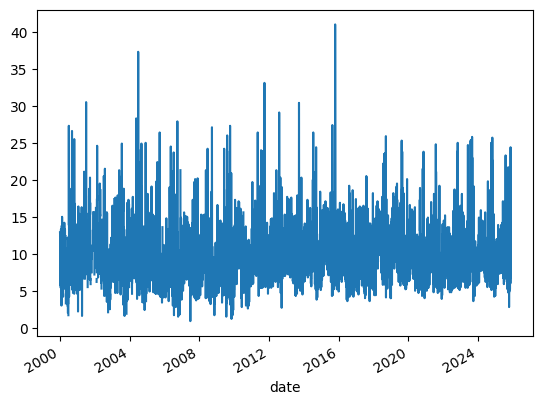

In [550]:
WeatherMun["wspd"].plot()

In [551]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2000-01-01,28.1,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN
2000-01-02,27.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,27.0,NaN,NaN,0.0,NaN,NaN,12.9,NaN,NaN,NaN
2000-01-04,26.9,23.0,30.0,0.0,NaN,NaN,12.7,NaN,NaN,NaN
2000-01-05,27.2,NaN,NaN,0.0,NaN,NaN,7.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-11-15,29.0,26.0,33.0,NaN,NaN,NaN,9.0,NaN,1010.1,NaN
NaT,NaN,26.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,26.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [552]:
WeatherMun['target'] = WeatherMun.shift(-1)["tmax"]

In [553]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,target
date,,,,,,,,,,,
2000-01-01,28.1,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2000-01-02,27.3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,27.0,NaN,NaN,0.0,NaN,NaN,12.9,NaN,NaN,NaN,30.0
2000-01-04,26.9,23.0,30.0,0.0,NaN,NaN,12.7,NaN,NaN,NaN,NaN
2000-01-05,27.2,NaN,NaN,0.0,NaN,NaN,7.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-15,29.0,26.0,33.0,NaN,NaN,NaN,9.0,NaN,1010.1,NaN,33.0
NaT,NaN,26.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
NaT,NaN,26.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0


In [554]:
WeatherMun = WeatherMun.ffill()

In [555]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,target
date,,,,,,,,,,,
2000-01-01,28.1,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2000-01-02,27.3,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2000-01-03,27.0,NaN,NaN,0.0,NaN,NaN,12.9,NaN,NaN,NaN,30.0
2000-01-04,26.9,23.0,30.0,0.0,NaN,NaN,12.7,NaN,NaN,NaN,30.0
2000-01-05,27.2,23.0,30.0,0.0,NaN,NaN,7.7,NaN,NaN,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-15,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,33.0
NaT,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,33.0
NaT,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,33.0


In [556]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [557]:
predictors = WeatherMun.columns[~WeatherMun.columns.isin(["target"])]

In [558]:
predictors

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

In [559]:
def backtest(WeatherMun, model, predictors, start=3650, step=90):
     from sklearn.ensemble import HistGradientBoostingRegressor
     import pandas as pd
     all_predictions = []
     for i in range(start,WeatherMun.shape[0], step):
        train = WeatherMun.iloc[:i,:]
        test = WeatherMun.iloc[i:(i+step),:]

        train_clean = train[train["target"].notna()]
        
        model = HistGradientBoostingRegressor()
        model.fit(train_clean[predictors], train_clean["target"])
        
        preds = model.predict(test[predictors]) 
        preds = pd.Series(preds, index=test.index) 
        
        combined = pd.concat([test["target"], preds], axis=1) 
        
        combined.columns = ["actual", "prediction"] 
        
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
        return pd.concat(all_predictions)

In [560]:
predictions = backtest(WeatherMun, rr, predictors)

In [561]:
predictions


,actual,prediction,diff
date,,,
2009-12-29,30.0,30.513662,0.513662
2009-12-30,30.0,30.745590,0.745590
2009-12-31,30.0,30.503503,0.503503
2010-01-01,32.0,30.543257,1.456743
2010-01-02,30.0,31.547045,1.547045
...,...,...,...
2010-03-24,35.0,33.551725,1.448275
2010-03-25,32.0,34.169336,2.169336
2010-03-26,34.0,31.393335,2.606665


In [562]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.9347782265189509

In [563]:
predictions["diff"].mean()

np.float64(0.9347782265189509)

In [564]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(WeatherMun, horizon, col):
    label = f"rolling_{horizon}_{col}"

    WeatherMun[label] = WeatherMun[col].rolling(horizon).mean()
    WeatherMun[f"{label}_pct"] = pct_diff(WeatherMun[label], WeatherMun[col])
    return WeatherMun

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        WeatherMun = compute_rolling(WeatherMun, horizon, col)


In [565]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,28.1,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,27.3,NaN,NaN,0.0,NaN,NaN,4.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,27.0,NaN,NaN,0.0,NaN,NaN,12.9,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,26.9,23.0,30.0,0.0,NaN,NaN,12.7,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,27.2,23.0,30.0,0.0,NaN,NaN,7.7,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-15,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,...,26.0,0.0,1.3,0.0,33.0,0.0,26.0,0.0,1.3,0.0
NaT,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,...,26.0,0.0,1.3,0.0,33.0,0.0,26.0,0.0,1.3,0.0
NaT,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,...,26.0,0.0,1.3,0.0,33.0,0.0,26.0,0.0,1.3,0.0


In [566]:
WeatherMun = WeatherMun.iloc[14:,:]

In [567]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
date,,,,,,,,,,,,,,,,,,,,,
2000-01-15,27.7,25.0,31.0,0.0,NaN,NaN,9.6,NaN,NaN,NaN,...,24.000000,0.041667,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2000-01-16,27.2,25.0,32.0,0.0,NaN,NaN,6.6,NaN,NaN,NaN,...,24.666667,0.013514,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2000-01-17,27.5,22.0,31.0,0.0,NaN,NaN,5.7,NaN,NaN,NaN,...,24.000000,-0.083333,0.0,NaN,30.571429,0.014019,23.500000,-0.063830,0.0,NaN
2000-01-18,26.5,25.0,30.0,0.0,NaN,NaN,11.0,NaN,NaN,NaN,...,24.000000,0.041667,0.0,NaN,30.571429,-0.018692,23.642857,0.057402,0.0,NaN
2000-01-19,26.5,25.0,29.0,0.0,NaN,NaN,5.4,NaN,NaN,NaN,...,24.000000,0.041667,0.0,NaN,30.500000,-0.049180,23.785714,0.051051,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-15,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,...,26.000000,0.000000,1.3,0.0,33.000000,0.000000,26.000000,0.000000,1.3,0.0
NaT,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,...,26.000000,0.000000,1.3,0.0,33.000000,0.000000,26.000000,0.000000,1.3,0.0
NaT,29.0,26.0,33.0,1.3,NaN,NaN,9.0,NaN,1010.1,NaN,...,26.000000,0.000000,1.3,0.0,33.000000,0.000000,26.000000,0.000000,1.3,0.0


In [568]:
WeatherMun = WeatherMun.fillna(0)

In [569]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp",]:
    WeatherMun[f"month_avg_{col}"] = WeatherMun[col].groupby(WeatherMun.index, group_keys=False).apply(expand_mean)
    WeatherMun[f"day_avg_{col}"] = WeatherMun[col].groupby(WeatherMun.index.day_of_year, group_keys=False).apply(expand_mean)

In [570]:
WeatherMun

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2000-01-15,27.7,25.0,31.0,0.0,0.0,0.0,9.6,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,31.0,31.0,25.0,25.000000,0.0,0.000000
2000-01-16,27.2,25.0,32.0,0.0,0.0,0.0,6.6,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,32.0,32.0,25.0,25.000000,0.0,0.000000
2000-01-17,27.5,22.0,31.0,0.0,0.0,0.0,5.7,0.0,0.0,0.0,...,23.500000,-0.063830,0.0,0.0,31.0,31.0,22.0,22.000000,0.0,0.000000
2000-01-18,26.5,25.0,30.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,...,23.642857,0.057402,0.0,0.0,30.0,30.0,25.0,25.000000,0.0,0.000000
2000-01-19,26.5,25.0,29.0,0.0,0.0,0.0,5.4,0.0,0.0,0.0,...,23.785714,0.051051,0.0,0.0,29.0,29.0,25.0,25.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-15,29.0,26.0,33.0,1.3,0.0,0.0,9.0,0.0,1010.1,0.0,...,26.000000,0.000000,1.3,0.0,33.0,32.0,26.0,25.076923,1.3,0.653846
NaT,29.0,26.0,33.0,1.3,0.0,0.0,9.0,0.0,1010.1,0.0,...,26.000000,0.000000,1.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN
NaT,29.0,26.0,33.0,1.3,0.0,0.0,9.0,0.0,1010.1,0.0,...,26.000000,0.000000,1.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [571]:
predictors = WeatherMun.columns[~WeatherMun.columns.isin(["target"])]

In [572]:
predictors

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'rolling_3_tmax', 'rolling_3_tmax_pct', 'rolling_3_tmin',
       'rolling_3_tmin_pct', 'rolling_3_prcp', 'rolling_3_prcp_pct',
       'rolling_14_tmax', 'rolling_14_tmax_pct', 'rolling_14_tmin',
       'rolling_14_tmin_pct', 'rolling_14_prcp', 'rolling_14_prcp_pct',
       'month_avg_tmax', 'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin',
       'month_avg_prcp', 'day_avg_prcp'],
      dtype='object')

In [573]:
predictions = backtest(WeatherMun, rr, predictors)

In [574]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.8567679924309004

In [575]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
date,,,
2010-03-05,35.0,32.520207,2.479793
2010-03-25,32.0,34.057111,2.057111
2010-01-26,33.0,30.974500,2.025500
2010-03-15,35.0,33.060560,1.939440
2010-03-12,34.0,32.117149,1.882851
...,...,...,...
2010-01-23,30.0,29.881482,0.118518
2010-02-02,32.0,32.112759,0.112759
2010-03-09,34.0,33.888854,0.111146


In [576]:
WeatherMun.index = pd.to_datetime(WeatherMun.index)

In [577]:
WeatherMun[
    (WeatherMun.index >= "2010-03-05") &
    (WeatherMun.index <= "2010-03-25")
]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2010-03-05,27.8,25.0,33.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,...,24.571429,0.017442,0.0,0.0,33.0,31.909091,25.0,24.727273,0.0,0.0
2010-03-06,29.3,23.0,35.0,0.0,0.0,0.0,8.8,0.0,0.0,0.0,...,24.500000,-0.061224,0.0,0.0,35.0,32.000000,23.0,24.181818,0.0,0.0
2010-03-07,29.7,25.0,35.0,0.0,0.0,0.0,9.1,0.0,0.0,0.0,...,24.571429,0.017442,0.0,0.0,35.0,32.181818,25.0,24.272727,0.0,0.0
2010-03-08,30.0,28.0,35.0,0.0,0.0,0.0,13.8,0.0,0.0,0.0,...,24.857143,0.126437,0.0,0.0,35.0,32.636364,28.0,24.363636,0.0,0.0
2010-03-09,29.6,27.0,35.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,...,24.928571,0.083095,0.0,0.0,35.0,32.272727,27.0,24.272727,0.0,0.0
2010-03-10,28.8,26.0,34.0,0.0,0.0,0.0,11.7,0.0,0.0,0.0,...,24.928571,0.042980,0.0,0.0,34.0,32.000000,26.0,23.818182,0.0,0.0
2010-03-11,28.0,26.0,33.0,0.0,0.0,0.0,10.7,0.0,0.0,0.0,...,24.928571,0.042980,0.0,0.0,33.0,31.818182,26.0,24.272727,0.0,0.0
2010-03-12,27.4,26.0,32.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,...,25.142857,0.034091,0.0,0.0,32.0,32.272727,26.0,24.000000,0.0,0.0
2010-03-13,29.5,25.0,34.0,0.0,0.0,0.0,10.7,0.0,0.0,0.0,...,25.142857,-0.005682,0.0,0.0,34.0,32.363636,25.0,24.272727,0.0,0.0


In [578]:
type(WeatherMun.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Axes: xlabel='diff'>

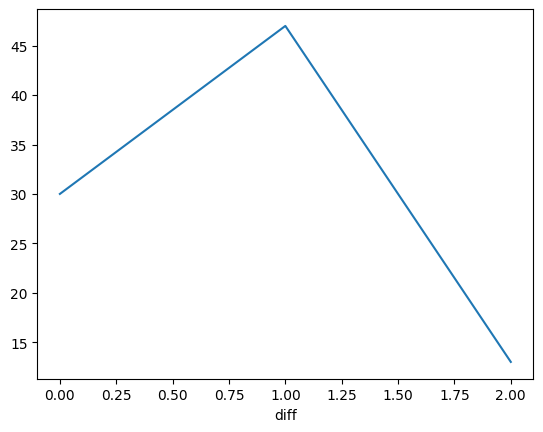

In [579]:
predictions["diff"].round().value_counts().sort_index().plot()

In [580]:
WeatherMun[
    (WeatherMun.index >= "2025-11-09") &
    (WeatherMun.index <= "2025-11-11")
]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2025-11-09,27.0,26.0,33.0,1.3,0.0,0.0,19.8,0.0,1000.6,0.0,...,26.0,0.0,1.3,0.0,33.0,32.038462,26.0,24.961538,1.3,2.300000
2025-11-10,27.9,26.0,33.0,1.3,0.0,0.0,24.4,0.0,998.8,0.0,...,26.0,0.0,1.3,0.0,33.0,32.038462,26.0,24.769231,1.3,2.838462
2025-11-11,28.6,26.0,33.0,1.3,0.0,0.0,14.1,0.0,1005.2,0.0,...,26.0,0.0,1.3,0.0,33.0,32.192308,26.0,25.076923,1.3,0.130769


In [581]:
WeatherMun[
    (WeatherMun.index >= "2025-11-09") &
    (WeatherMun.index <= "2025-11-15")
]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2025-11-09,27.0,26.0,33.0,1.3,0.0,0.0,19.8,0.0,1000.6,0.0,...,26.0,0.0,1.3,0.0,33.0,32.038462,26.0,24.961538,1.3,2.300000
2025-11-10,27.9,26.0,33.0,1.3,0.0,0.0,24.4,0.0,998.8,0.0,...,26.0,0.0,1.3,0.0,33.0,32.038462,26.0,24.769231,1.3,2.838462
2025-11-11,28.6,26.0,33.0,1.3,0.0,0.0,14.1,0.0,1005.2,0.0,...,26.0,0.0,1.3,0.0,33.0,32.192308,26.0,25.076923,1.3,0.130769
2025-11-12,29.0,26.0,33.0,1.3,0.0,0.0,8.9,0.0,1008.8,0.0,...,26.0,0.0,1.3,0.0,33.0,31.846154,26.0,25.192308,1.3,1.442308
2025-11-13,29.1,26.0,33.0,1.3,0.0,0.0,8.4,0.0,1009.5,0.0,...,26.0,0.0,1.3,0.0,33.0,31.846154,26.0,25.115385,1.3,6.069231
2025-11-14,29.2,26.0,33.0,1.3,0.0,0.0,7.9,0.0,1009.6,0.0,...,26.0,0.0,1.3,0.0,33.0,32.115385,26.0,25.384615,1.3,2.180769
2025-11-15,29.0,26.0,33.0,1.3,0.0,0.0,9.0,0.0,1010.1,0.0,...,26.0,0.0,1.3,0.0,33.0,32.000000,26.0,25.076923,1.3,0.653846


In [582]:
WeatherMun[
    (WeatherMun.index >= "2025-11-09") &
]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2025-11-09,27.0,26.0,33.0,1.3,0.0,0.0,19.8,0.0,1000.6,0.0,...,26.0,0.0,1.3,0.0,33.0,32.038462,26.0,24.961538,1.3,2.300000
2025-11-10,27.9,26.0,33.0,1.3,0.0,0.0,24.4,0.0,998.8,0.0,...,26.0,0.0,1.3,0.0,33.0,32.038462,26.0,24.769231,1.3,2.838462
2025-11-11,28.6,26.0,33.0,1.3,0.0,0.0,14.1,0.0,1005.2,0.0,...,26.0,0.0,1.3,0.0,33.0,32.192308,26.0,25.076923,1.3,0.130769
2025-11-12,29.0,26.0,33.0,1.3,0.0,0.0,8.9,0.0,1008.8,0.0,...,26.0,0.0,1.3,0.0,33.0,31.846154,26.0,25.192308,1.3,1.442308
2025-11-13,29.1,26.0,33.0,1.3,0.0,0.0,8.4,0.0,1009.5,0.0,...,26.0,0.0,1.3,0.0,33.0,31.846154,26.0,25.115385,1.3,6.069231
2025-11-14,29.2,26.0,33.0,1.3,0.0,0.0,7.9,0.0,1009.6,0.0,...,26.0,0.0,1.3,0.0,33.0,32.115385,26.0,25.384615,1.3,2.180769
2025-11-15,29.0,26.0,33.0,1.3,0.0,0.0,9.0,0.0,1010.1,0.0,...,26.0,0.0,1.3,0.0,33.0,32.000000,26.0,25.076923,1.3,0.653846


In [584]:
X = WeatherMun.drop("target", axis=1) 
y = WeatherMun["target"]

In [585]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [586]:
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

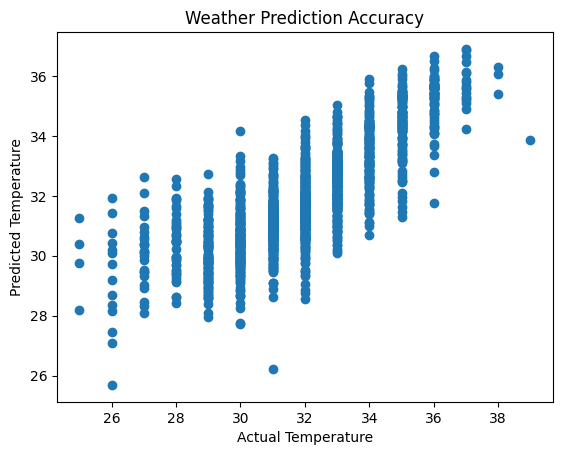

In [587]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Weather Prediction Accuracy")
plt.show()

In [588]:
predictions = pd.DataFrame({
    "date": X_test.index,
    "Actual": y_test,
    "Predicted": y_pred
})
predictions.head()

,date,Actual,Predicted
date,,,
2001-08-04,2001-08-04,30.0,29.493353
2008-04-27,2008-04-27,33.0,32.546078
2006-10-08,2006-10-08,31.0,29.094651
2003-05-16,2003-05-16,34.0,34.251285
2022-02-17,2022-02-17,33.0,32.976804


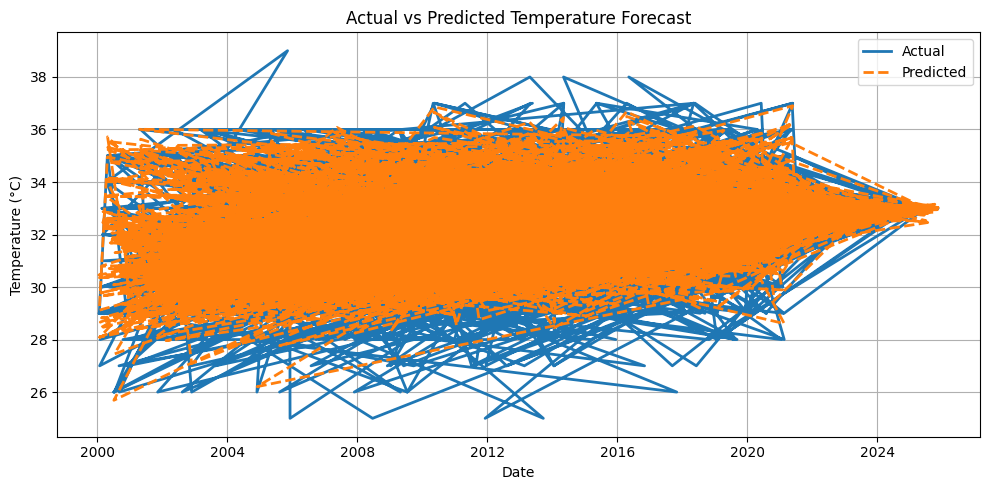

In [589]:
plt.figure(figsize=(10,5))
plt.plot(predictions["date"], predictions["Actual"], label="Actual", linewidth=2)
plt.plot(predictions["date"], predictions["Predicted"], label="Predicted", linestyle="--", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [590]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.82
Root Mean Squared Error: 1.21


In [596]:
from prophet import Prophet

df = WeatherMun.reset_index()[["date", "target"]]
df.columns = ["ds", "y"]

df = df.dropna(subset=["ds", "y"])          
df["ds"] = pd.to_datetime(df["ds"])        
df = df[df["ds"].notnull()]                 
df = df.sort_values("ds")                   


model = Prophet()
model.fit(df)


future = model.make_future_dataframe(periods=14)  # 14 days ahead
forecast = model.predict(future)

#Ythat_lower means minimum
#Ythat_upper means maximum

forecast[forecast["ds"] == "2025-11-23"][["ds", "yhat", "yhat_lower", "yhat_upper"]]

16:35:48 - cmdstanpy - INFO - Chain [1] start processing
16:35:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
9444,2025-11-23,32.767661,30.627654,34.727692


In [597]:
df = WeatherMun.reset_index()[["date", "target"]]
df.columns = ["ds", "y"]

df = df.dropna(subset=["ds", "y"])          
df["ds"] = pd.to_datetime(df["ds"])        
df = df[df["ds"].notnull()]                 
df = df.sort_values("ds")                   


model = Prophet()
model.fit(df)


future = model.make_future_dataframe(periods=16)  # 16 days ahead
forecast = model.predict(future)

#Ythat_lower means minimum
#Ythat_upper means maximum

forecast[forecast["ds"] == "2025-11-25"][["ds", "yhat", "yhat_lower", "yhat_upper"]]

16:36:30 - cmdstanpy - INFO - Chain [1] start processing
16:36:34 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
9446,2025-11-25,32.705845,30.531245,34.62246
